## PREDICTION OF OIL, GAS AND WATER PRODUCTION FROM DSEATS FIELD USING MACHINE LEARNING

## 1. IMPORTATION OF LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import missingno as msn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from scipy import stats

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

### 2. LOADING THE DATA

In [ ]:
data = pd.read_csv('/content/dseats_2024_training_dataset.csv')
data.head(10) #first ten rows of train data
data

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,7/4/2014 0:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
1,8/4/2014 0:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
2,9/4/2014 0:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
3,10/4/2014 0:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
4,11/4/2014 0:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.454030,370.025890,4020.534770,0.000000,479.919260,33.071950,0.0000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,26/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2903.229117,379.373252,2460.629972,182.554483,442.599145,1.880480,747.8181,614123.984,64.2838
6921,27/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2905.030564,379.379814,2456.159205,184.106427,448.871358,2.120109,749.2019,614168.462,64.4725
6922,28/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2928.389988,379.313739,2484.425946,175.609150,443.964042,1.980460,789.9611,648175.070,65.9192
6923,29/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2939.874982,379.288114,2496.000496,173.255362,443.874486,1.692930,789.7724,637067.219,63.3403


##3.  DATA WRANGLING

In [ ]:
data.describe() #statistical measures about train data

,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
count,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6919.000000,6925.000000,6.925000e+03,6925.000000
mean,107.297040,2587.482923,349.674794,2161.986343,180.369383,716.576882,21.864557,8494.774524,6.978690e+06,11480.559310
std,0.980161,1588.474034,46.240823,1053.875029,139.771514,347.859953,22.300691,8927.596731,7.100875e+06,11484.481008
min,105.000000,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2879.813600
25%,107.000000,0.000000,273.150000,896.612291,0.000000,476.539814,4.631982,1686.600600,1.434288e+06,80.323300
50%,107.000000,3378.397358,376.911370,2472.031527,213.091127,619.647824,14.301660,5479.470600,4.770461e+06,5529.413200
75%,108.000000,3664.905359,379.496193,2907.047474,300.356843,903.890487,31.529768,11730.472600,9.892230e+06,22261.505100
max,109.000000,4606.666675,381.652178,4592.612695,435.287508,1991.009935,125.718570,37122.573600,3.004494e+07,50444.164600


In [ ]:
data.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6925 entries, 0 to 6924
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PRODUCTION DATE                6925 non-null   object 
 1   Field Name                     6925 non-null   object 
 2   WELL_BORE_CODE                 6925 non-null   object 
 3   N_WELL_BORE_CODE               6925 non-null   int64  
 4   WellBore Name                  6925 non-null   object 
 5   FLOW_KIND                      6925 non-null   object 
 6   WELL_TYPE                      6925 non-null   object 
 7   Downhole Pressure (PSI)        6925 non-null   float64
 8   Downhole Temperature (Kelvin)  6925 non-null   float64
 9   Average Tubing Pressure        6925 non-null   float64
 10  Annulus Pressure (PSI)         6925 non-null   float64
 11  AVG WHP (PSI)                  6925 non-null   float64
 12  Choke Size                     6919 non-null   f

<Axes: >

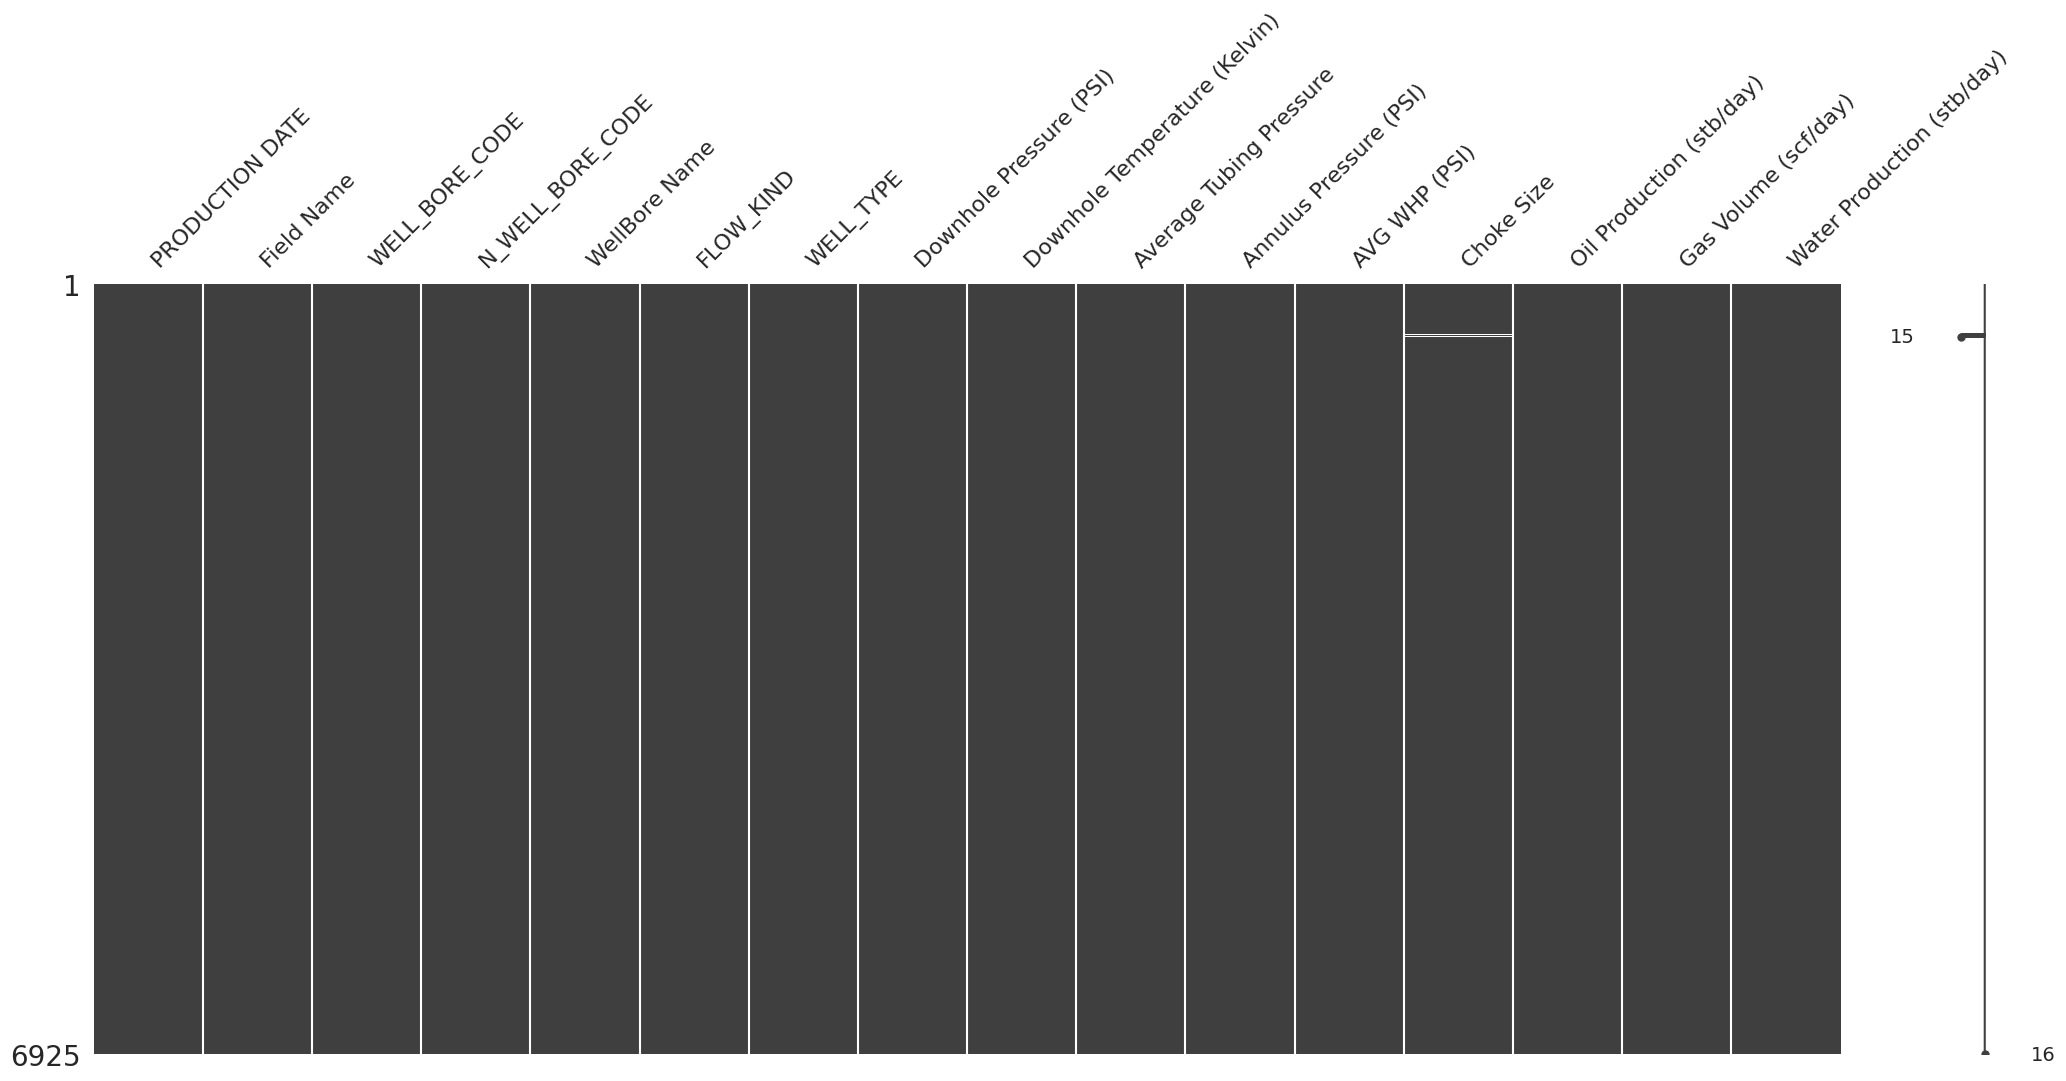

In [ ]:
#visualizing missing values per column
msn.matrix(data)

In [ ]:
##From the above, only Choke Size has null values

missing_count_in_Choke_size = data["Choke Size"].isna().sum()
print(f"Percentage of rows with missing values in Choke Size: {(missing_count_in_Choke_size/len(data)) * 100} %")


Percentage of rows with missing values in Choke Size: 0.08664259927797834 %


#### This means we can drop all rows having missing values since this constitute less than one percent of our original dataset

In [ ]:
cleaned_data = data.dropna()
missing_count_in_Choke_size = cleaned_data["Choke Size"].isna().sum()
print(f"Percentage of rows with missing values in Choke Size: {(missing_count_in_Choke_size/len(cleaned_data)) * 100} %")

Percentage of rows with missing values in Choke Size: 0.0 %


In [ ]:
##Check for invalid dates and convert them to ensure consistency
date_format = '%d/%m/%Y %H:%M'
validated_dates = pd.to_datetime(cleaned_data['PRODUCTION DATE'], format=date_format, errors='coerce')

# Identify invalid dates
invalid_dates = validated_dates.isna()
print(f"Number of invalid dates found: {invalid_dates.sum()}")

Number of invalid dates found: 0


In [ ]:
##All dates are formatted correctly and are consistent
##We convert the original date strings to the datetime type so that operations are more efficient
cleaned_data['PRODUCTION DATE'] = pd.to_datetime(cleaned_data['PRODUCTION DATE'], format=date_format)
cleaned_data.head(10)

<ipython-input-293-bdf50027162b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['PRODUCTION DATE'] = pd.to_datetime(cleaned_data['PRODUCTION DATE'], format=date_format)


,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2014-04-07,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.15000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
1,2014-04-08,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.15000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
2,2014-04-09,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.15000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
3,2014-04-10,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.15000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
4,2014-04-11,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.454030,370.02589,4020.534770,0.0,479.919260,33.07195,0.0,0.0,0.0
5,2014-04-12,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4400.761310,370.07339,4080.987880,0.0,319.773430,22.05334,0.0,0.0,0.0
6,2014-04-13,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4401.254745,370.10885,4002.464000,0.0,398.790745,16.16326,0.0,0.0,0.0
7,2014-04-14,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4404.843060,370.11873,4100.408020,0.0,304.435040,20.73712,0.0,0.0,0.0
8,2014-04-15,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4405.944045,370.17136,4204.139715,0.0,201.804330,12.18153,0.0,0.0,0.0
9,2014-04-16,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4404.982115,370.21569,4345.242985,0.0,59.739130,1.49020,0.0,0.0,0.0


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6919 entries, 0 to 6924
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   PRODUCTION DATE                6919 non-null   datetime64[ns]
 1   Field Name                     6919 non-null   object        
 2   WELL_BORE_CODE                 6919 non-null   object        
 3   N_WELL_BORE_CODE               6919 non-null   int64         
 4   WellBore Name                  6919 non-null   object        
 5   FLOW_KIND                      6919 non-null   object        
 6   WELL_TYPE                      6919 non-null   object        
 7   Downhole Pressure (PSI)        6919 non-null   float64       
 8   Downhole Temperature (Kelvin)  6919 non-null   float64       
 9   Average Tubing Pressure        6919 non-null   float64       
 10  Annulus Pressure (PSI)         6919 non-null   float64       
 11  AVG WHP (PSI)         

## 3.1 EXPLORATORY DATA ANALYSIS


#Visualizing The Distribution of Target Variables

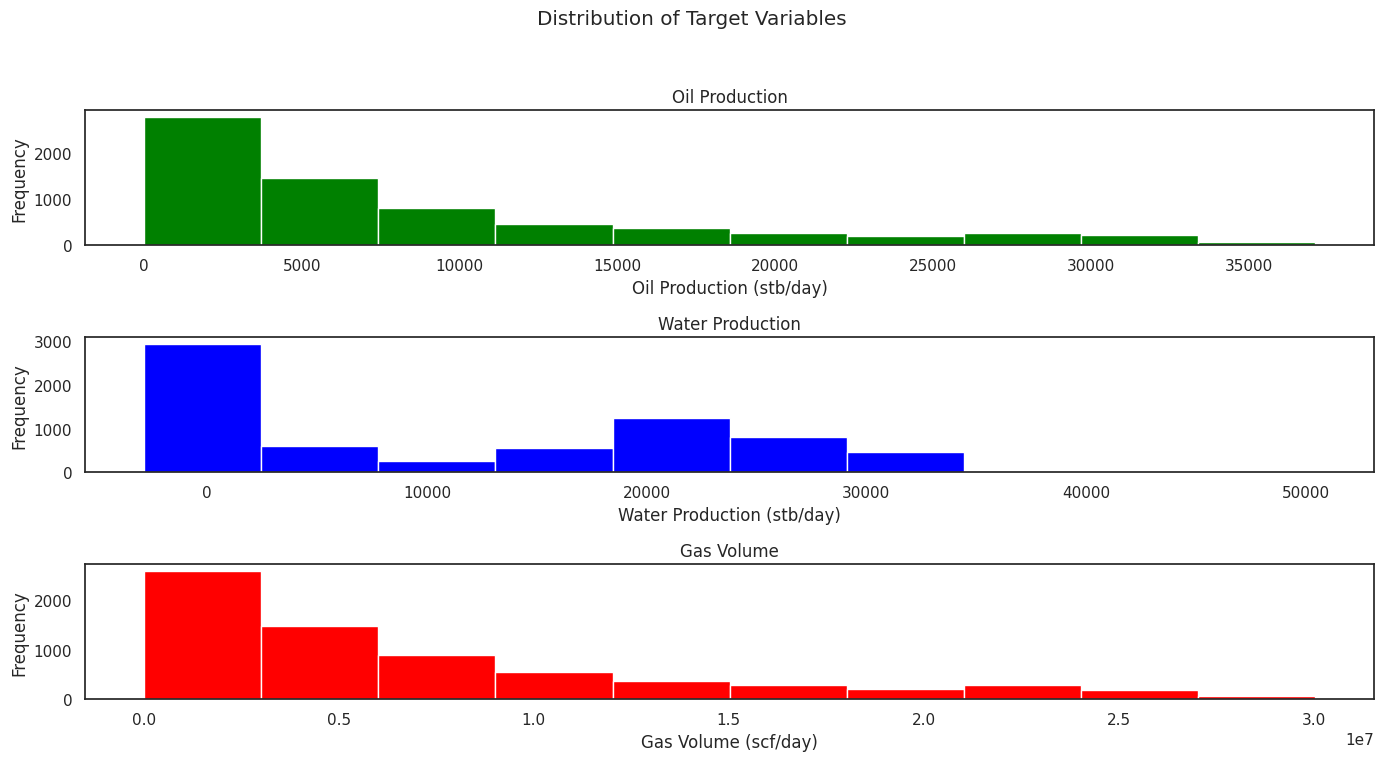

In [ ]:
# Visualizing distribution of target variables
# Creating a figure for the histograms
plt.figure(figsize=(14, 8))
plt.suptitle('Distribution of Target Variables')

# Histogram for Oil Production
plt.subplot(3, 1, 1)
plt.hist(data['Oil Production (stb/day)'], bins=10, color='green')
plt.title('Oil Production')
plt.xlabel('Oil Production (stb/day)')
plt.ylabel('Frequency')

# Histogram for Water Production
plt.subplot(3, 1, 2)
plt.hist(data['Water Production (stb/day)'], bins=10, color='blue')
plt.title('Water Production')
plt.xlabel('Water Production (stb/day)')
plt.ylabel('Frequency')

# Histogram for Gas Volume
plt.subplot(3, 1, 3)
plt.hist(cleaned_data['Gas Volume (scf/day)'], bins=10, color='red')
plt.title('Gas Volume')
plt.xlabel('Gas Volume (scf/day)')
plt.ylabel('Frequency')

# Adjust layout and display plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Visualizing Outliers For Features

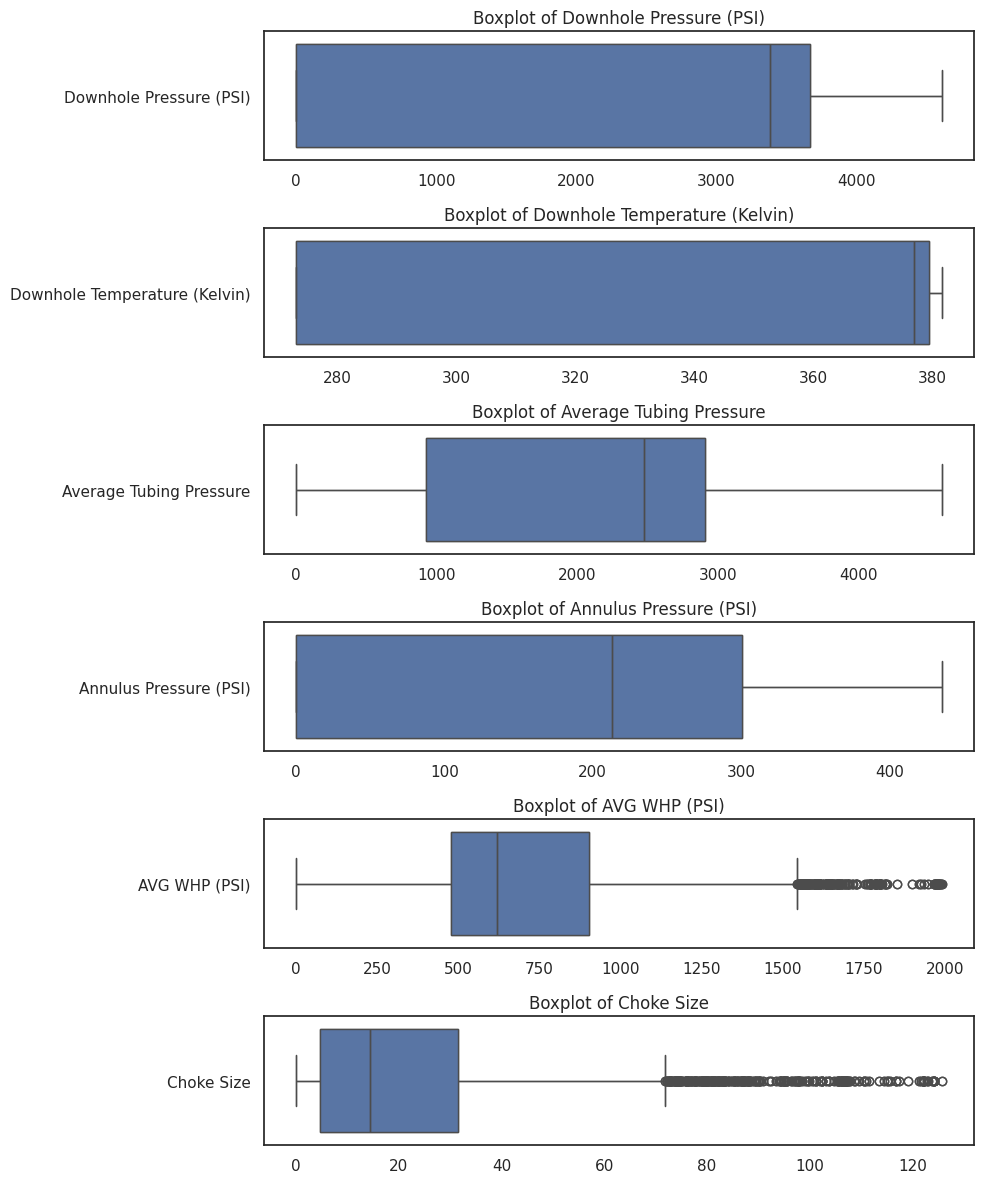

In [ ]:
#visualizing outliers for features since they have a similar scale
features = [
    'Downhole Pressure (PSI)',
    'Downhole Temperature (Kelvin)',
    'Average Tubing Pressure',
    'Annulus Pressure (PSI)',
    'AVG WHP (PSI)',
    'Choke Size'
]

# Showing number of features
num_features = len(features)

# Creating  subplots for organized visualization
fig, axes = plt.subplots(num_features, 1, figsize=(10, 2 * num_features))

# Creating a boxplot for each feature
for i, feature in enumerate(features):
    sns.boxplot(data=cleaned_data[[feature]], orient='h', ax=axes[i])
    sns.boxplot(data=cleaned_data[[feature]], orient='h', ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Adjusting layout to make it presentable
plt.tight_layout()
plt.show()


###  Visualizing Outliers For Oil and Water Production

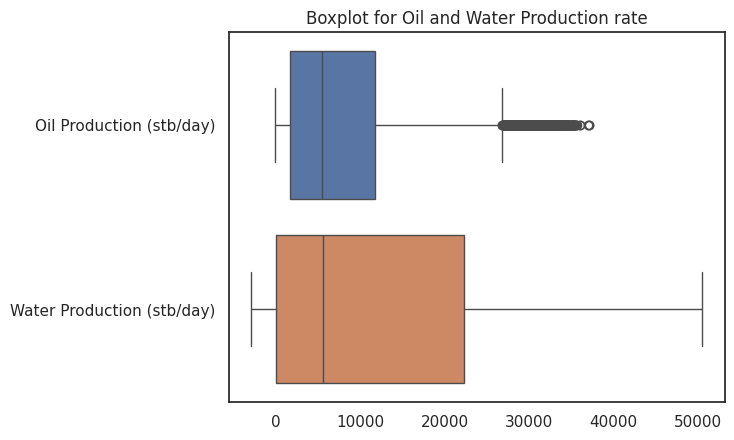

In [ ]:
#Visualizing outliers For Oil and Water Production
sns.boxplot(data=cleaned_data[['Oil Production (stb/day)','Water Production (stb/day)']], orient='h')
plt.title('Boxplot for Oil and Water Production rate')
plt.show()

### Visualizing outliers for gas production

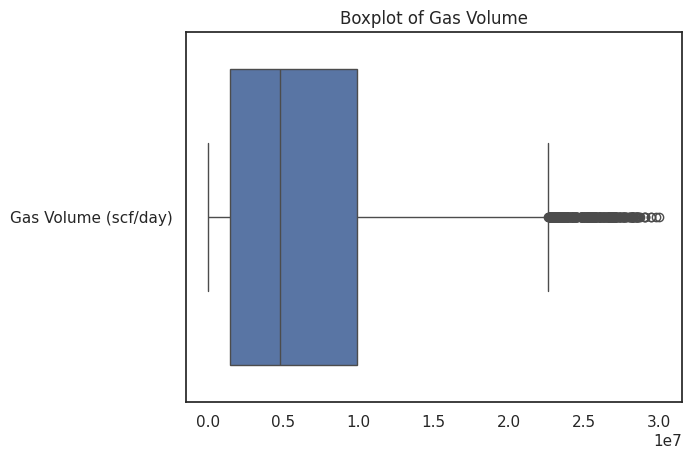

In [ ]:
#visualizing outliers for gas production

sns.boxplot(data=cleaned_data[['Gas Volume (scf/day)']], orient='h')
plt.title('Boxplot of Gas Volume')
plt.show()
#this is because the scale for the gas volume is different to enhance better visualization

### Converting the original date strings to the datetime type to visualize production with time.

In [ ]:
date_format = '%d/%m/%Y %H:%M'
data['PRODUCTION DATE'] = pd.to_datetime(data['PRODUCTION DATE'], format=date_format)
data.head(10)

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2014-04-07,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.15000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
1,2014-04-08,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.15000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
2,2014-04-09,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.15000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
3,2014-04-10,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.15000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
4,2014-04-11,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.454030,370.02589,4020.534770,0.0,479.919260,33.07195,0.0,0.0,0.0
5,2014-04-12,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4400.761310,370.07339,4080.987880,0.0,319.773430,22.05334,0.0,0.0,0.0
6,2014-04-13,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4401.254745,370.10885,4002.464000,0.0,398.790745,16.16326,0.0,0.0,0.0
7,2014-04-14,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4404.843060,370.11873,4100.408020,0.0,304.435040,20.73712,0.0,0.0,0.0
8,2014-04-15,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4405.944045,370.17136,4204.139715,0.0,201.804330,12.18153,0.0,0.0,0.0
9,2014-04-16,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4404.982115,370.21569,4345.242985,0.0,59.739130,1.49020,0.0,0.0,0.0


## DATA VISUALIZATION OF OIL,GAS AND WATER PRODUCTION WITH TIME

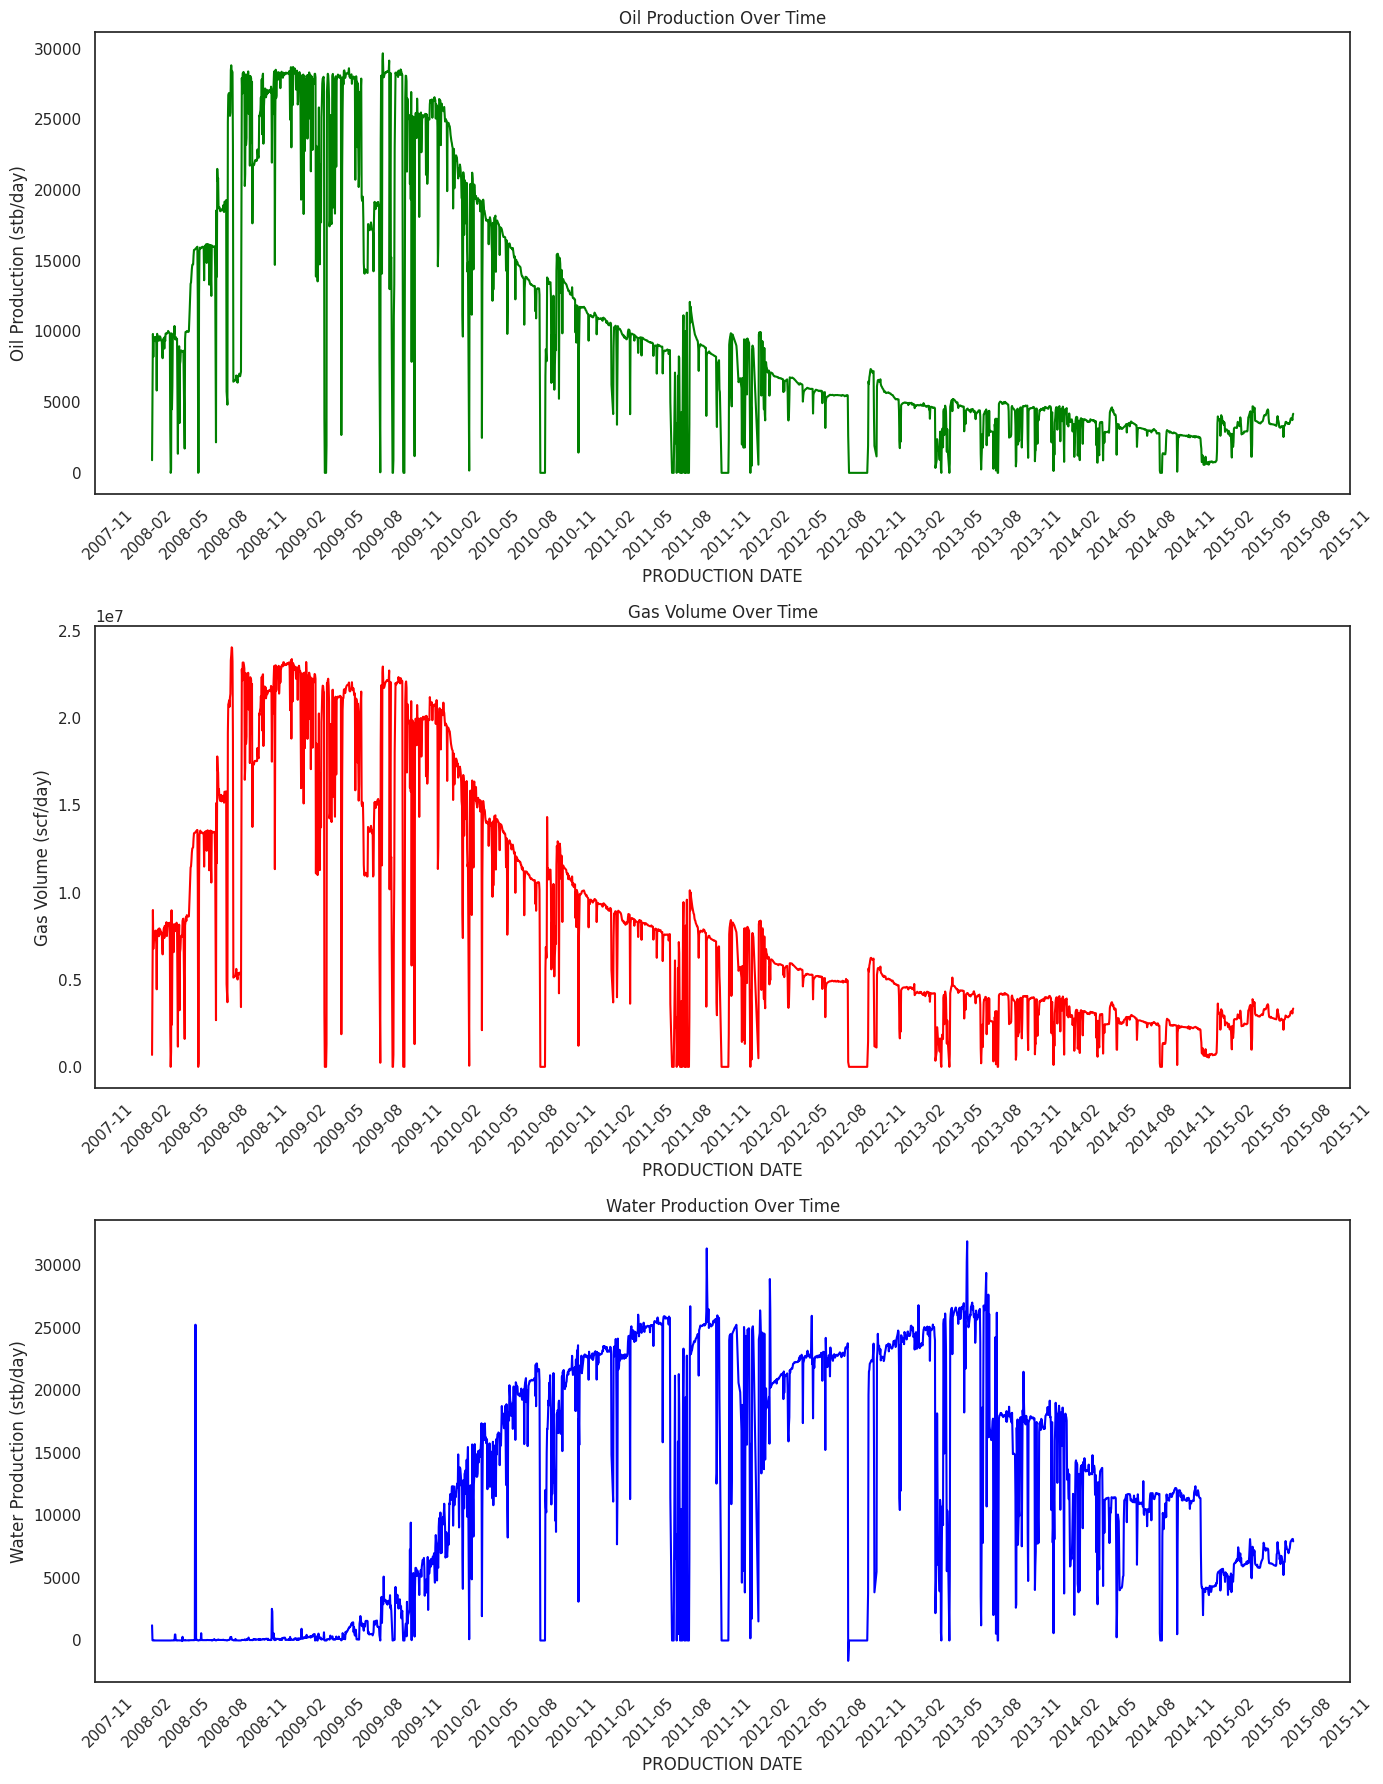

In [ ]:
# Setting the style of the visualization
sns.set_style("white")

# Creating a figure with subplots for each target variable
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# List of target variables and their corresponding colors and titles,green for oil,red for gas and blue for water
targets = ['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']
colors = ['green', 'red', 'blue']
titles = ['Oil Production Over Time', 'Gas Volume Over Time', 'Water Production Over Time']

# Create individual line plots with custom colors
for i, target in enumerate(targets):
    sns.lineplot(data=cleaned_data, x='PRODUCTION DATE', y=target, ax=axes[i], color=colors[i], errorbar=None)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('PRODUCTION DATE')
    axes[i].set_ylabel(target)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show dates for every 3rd month
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format date as Year-Month

# Adjust layout
plt.tight_layout()
plt.show()


## VISUALIZING PRODUCTION RATES FROM VARIOUS WELLBORE CODES SPECIFYING THE PARTICULAR WELLBORES WHERE PRODUCTION RATES ARE COMING FROM

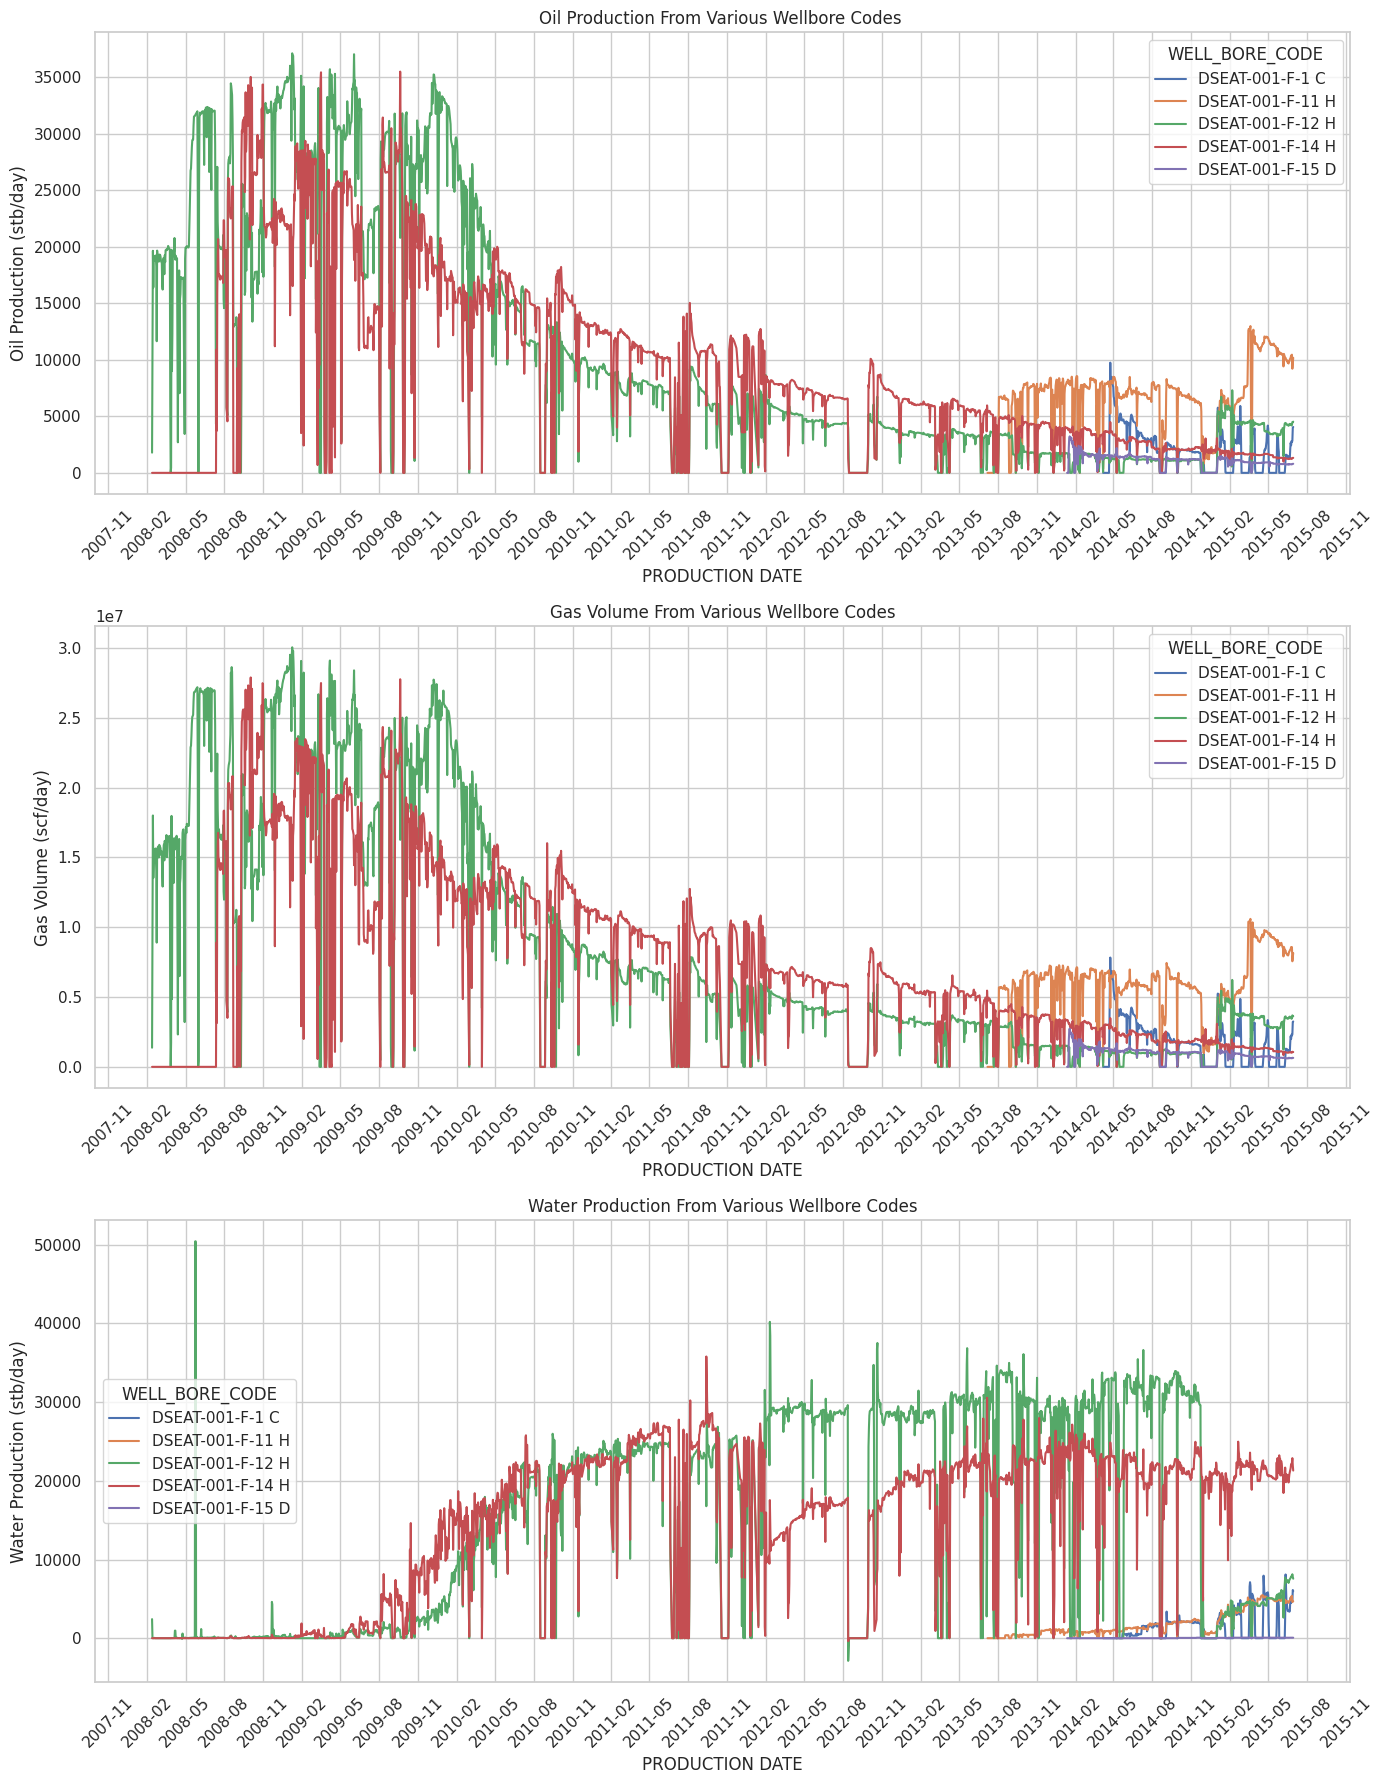

In [ ]:
# Setting the style of the visualization
sns.set_style("whitegrid")

# Creating a figure with subplots for each target variable
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# List of target variables and their corresponding colors and titles
targets = ['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']
titles = ['Oil Production From Various Wellbore Codes ', 'Gas Volume From Various Wellbore Codes', 'Water Production From Various Wellbore Codes']

# Creating individual line plots with well bore codes as legends using hue from lineplot
for i, target in enumerate(targets):
    sns.lineplot(data=cleaned_data, x='PRODUCTION DATE', y=target, hue='WELL_BORE_CODE', ax=axes[i],errorbar=None)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('PRODUCTION DATE')
    axes[i].set_ylabel(target)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Showing for every 3rd month
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatting date as Year-Month

# Adjust layout
plt.tight_layout()
plt.show()

## 4. FEATURE ENGINEERING

In [ ]:
##N_WELL_BORE_CODE is an ID for WELL_BORE_CODE and Well Bore Name, this means every row with a particular WELL_BORE_CODE has the same value for
##N_WELL_BORE_CODE and Well Bore Name
##We can then drop either two of them, I'd prefer to drop N_WELL_BORE_CODE and Well Bore Name
N_WELL_BORE_CODE_AND_N_WELL_BORE_CODE_AND_WELL_BORE_NAME = pd.DataFrame({
    'N_WELL_BORE_CODE': data['N_WELL_BORE_CODE'],
    'WELL_BORE_CODE': data['WELL_BORE_CODE'],
    'WELL_BORE_NAME': data['WellBore Name']
})

N_WELL_BORE_CODE_AND_N_WELL_BORE_CODE_AND_WELL_BORE_NAME .drop_duplicates(inplace=True)
N_WELL_BORE_CODE_AND_N_WELL_BORE_CODE_AND_WELL_BORE_NAME


,N_WELL_BORE_CODE,WELL_BORE_CODE,WELL_BORE_NAME
0,105,DSEAT-001-F-1 C,001-F-1 C
265,106,DSEAT-001-F-11 H,001-F-11
931,107,DSEAT-001-F-12 H,001-F-12
3288,108,DSEAT-001-F-14 H,001-F-14
5635,109,DSEAT-001-F-15 D,001-F-15 D


In [ ]:
cleaned_data.drop(columns=['N_WELL_BORE_CODE','WellBore Name'],inplace=True)
cleaned_data

<ipython-input-209-60500bd9def3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(columns=['N_WELL_BORE_CODE','WellBore Name'],inplace=True)


,PRODUCTION DATE,Field Name,WELL_BORE_CODE,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2014-04-07,DSEAT,DSEAT-001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
1,2014-04-08,DSEAT,DSEAT-001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
2,2014-04-09,DSEAT,DSEAT-001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
3,2014-04-10,DSEAT,DSEAT-001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
4,2014-04-11,DSEAT,DSEAT-001-F-1 C,production,OP,4500.454030,370.025890,4020.534770,0.000000,479.919260,33.071950,0.0000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,2015-06-26,DSEAT,DSEAT-001-F-15 D,production,OP,2903.229117,379.373252,2460.629972,182.554483,442.599145,1.880480,747.8181,614123.984,64.2838
6921,2015-06-27,DSEAT,DSEAT-001-F-15 D,production,OP,2905.030564,379.379814,2456.159205,184.106427,448.871358,2.120109,749.2019,614168.462,64.4725
6922,2015-06-28,DSEAT,DSEAT-001-F-15 D,production,OP,2928.389988,379.313739,2484.425946,175.609150,443.964042,1.980460,789.9611,648175.070,65.9192
6923,2015-06-29,DSEAT,DSEAT-001-F-15 D,production,OP,2939.874982,379.288114,2496.000496,173.255362,443.874486,1.692930,789.7724,637067.219,63.3403


In [ ]:
categorical_cols = [col for col in cleaned_data.columns if cleaned_data[col].dtype == 'object']
for col in categorical_cols:
    print(f"Column {col}: {cleaned_data[col].unique()}")

Column Field Name: ['DSEAT']
Column WELL_BORE_CODE: ['DSEAT-001-F-1 C' 'DSEAT-001-F-11 H' 'DSEAT-001-F-12 H'
 'DSEAT-001-F-14 H' 'DSEAT-001-F-15 D']
Column FLOW_KIND: ['production']
Column WELL_TYPE: ['OP' 'WI']


In [ ]:
##One can see that Field name and flow kind are of only one type, hence they do not contribute to the dependent variable
##We will drop them
cleaned_data.drop(columns=['Field Name','FLOW_KIND'],inplace=True)
cleaned_data

<ipython-input-211-640be4605ccd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(columns=['Field Name','FLOW_KIND'],inplace=True)


,PRODUCTION DATE,WELL_BORE_CODE,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2014-04-07,DSEAT-001-F-1 C,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
1,2014-04-08,DSEAT-001-F-1 C,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
2,2014-04-09,DSEAT-001-F-1 C,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
3,2014-04-10,DSEAT-001-F-1 C,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
4,2014-04-11,DSEAT-001-F-1 C,OP,4500.454030,370.025890,4020.534770,0.000000,479.919260,33.071950,0.0000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
6920,2015-06-26,DSEAT-001-F-15 D,OP,2903.229117,379.373252,2460.629972,182.554483,442.599145,1.880480,747.8181,614123.984,64.2838
6921,2015-06-27,DSEAT-001-F-15 D,OP,2905.030564,379.379814,2456.159205,184.106427,448.871358,2.120109,749.2019,614168.462,64.4725
6922,2015-06-28,DSEAT-001-F-15 D,OP,2928.389988,379.313739,2484.425946,175.609150,443.964042,1.980460,789.9611,648175.070,65.9192
6923,2015-06-29,DSEAT-001-F-15 D,OP,2939.874982,379.288114,2496.000496,173.255362,443.874486,1.692930,789.7724,637067.219,63.3403


In [ ]:
##encoding categorical cols using one-hot encoding
categorical_cols = [col for col in cleaned_data.columns if cleaned_data[col].dtype == 'object']
encoded_data = pd.get_dummies(cleaned_data, columns=categorical_cols,dtype=int)
encoded_data

,PRODUCTION DATE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day),WELL_BORE_CODE_DSEAT-001-F-1 C,WELL_BORE_CODE_DSEAT-001-F-11 H,WELL_BORE_CODE_DSEAT-001-F-12 H,WELL_BORE_CODE_DSEAT-001-F-14 H,WELL_BORE_CODE_DSEAT-001-F-15 D,WELL_TYPE_OP,WELL_TYPE_WI
0,2014-04-07,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000,1,0,0,0,0,1,0
1,2014-04-08,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000,1,0,0,0,0,1,0
2,2014-04-09,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000,1,0,0,0,0,1,0
3,2014-04-10,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000,1,0,0,0,0,1,0
4,2014-04-11,4500.454030,370.025890,4020.534770,0.000000,479.919260,33.071950,0.0000,0.000,0.0000,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,2015-06-26,2903.229117,379.373252,2460.629972,182.554483,442.599145,1.880480,747.8181,614123.984,64.2838,0,0,0,0,1,1,0
6921,2015-06-27,2905.030564,379.379814,2456.159205,184.106427,448.871358,2.120109,749.2019,614168.462,64.4725,0,0,0,0,1,1,0
6922,2015-06-28,2928.389988,379.313739,2484.425946,175.609150,443.964042,1.980460,789.9611,648175.070,65.9192,0,0,0,0,1,1,0
6923,2015-06-29,2939.874982,379.288114,2496.000496,173.255362,443.874486,1.692930,789.7724,637067.219,63.3403,0,0,0,0,1,1,0


In [ ]:
##tranform date column into numerical columns
encoded_data['Year'] = encoded_data['PRODUCTION DATE'].dt.year
encoded_data['Month'] = encoded_data['PRODUCTION DATE'].dt.month
encoded_data['Day'] = encoded_data['PRODUCTION DATE'].dt.day
encoded_data.drop(columns=['PRODUCTION DATE'],inplace=True)
encoded_data

,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day),WELL_BORE_CODE_DSEAT-001-F-1 C,WELL_BORE_CODE_DSEAT-001-F-11 H,WELL_BORE_CODE_DSEAT-001-F-12 H,WELL_BORE_CODE_DSEAT-001-F-14 H,WELL_BORE_CODE_DSEAT-001-F-15 D,WELL_TYPE_OP,WELL_TYPE_WI,Year,Month,Day
0,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000,1,0,0,0,0,1,0,2014,4,7
1,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000,1,0,0,0,0,1,0,2014,4,8
2,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000,1,0,0,0,0,1,0,2014,4,9
3,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000,1,0,0,0,0,1,0,2014,4,10
4,4500.454030,370.025890,4020.534770,0.000000,479.919260,33.071950,0.0000,0.000,0.0000,1,0,0,0,0,1,0,2014,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,2903.229117,379.373252,2460.629972,182.554483,442.599145,1.880480,747.8181,614123.984,64.2838,0,0,0,0,1,1,0,2015,6,26
6921,2905.030564,379.379814,2456.159205,184.106427,448.871358,2.120109,749.2019,614168.462,64.4725,0,0,0,0,1,1,0,2015,6,27
6922,2928.389988,379.313739,2484.425946,175.609150,443.964042,1.980460,789.9611,648175.070,65.9192,0,0,0,0,1,1,0,2015,6,28
6923,2939.874982,379.288114,2496.000496,173.255362,443.874486,1.692930,789.7724,637067.219,63.3403,0,0,0,0,1,1,0,2015,6,29


In [ ]:
##ensuring every column is numerical and has no null values
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6919 entries, 0 to 6924
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Downhole Pressure (PSI)          6919 non-null   float64
 1   Downhole Temperature (Kelvin)    6919 non-null   float64
 2   Average Tubing Pressure          6919 non-null   float64
 3   Annulus Pressure (PSI)           6919 non-null   float64
 4   AVG WHP (PSI)                    6919 non-null   float64
 5   Choke Size                       6919 non-null   float64
 6   Oil Production (stb/day)         6919 non-null   float64
 7   Gas Volume (scf/day)             6919 non-null   float64
 8   Water Production (stb/day)       6919 non-null   float64
 9   WELL_BORE_CODE_DSEAT-001-F-1 C   6919 non-null   int64  
 10  WELL_BORE_CODE_DSEAT-001-F-11 H  6919 non-null   int64  
 11  WELL_BORE_CODE_DSEAT-001-F-12 H  6919 non-null   int64  
 12  WELL_BORE_CODE_DSEAT-001-

## CORRELATION MATRIX AND HEATMAP

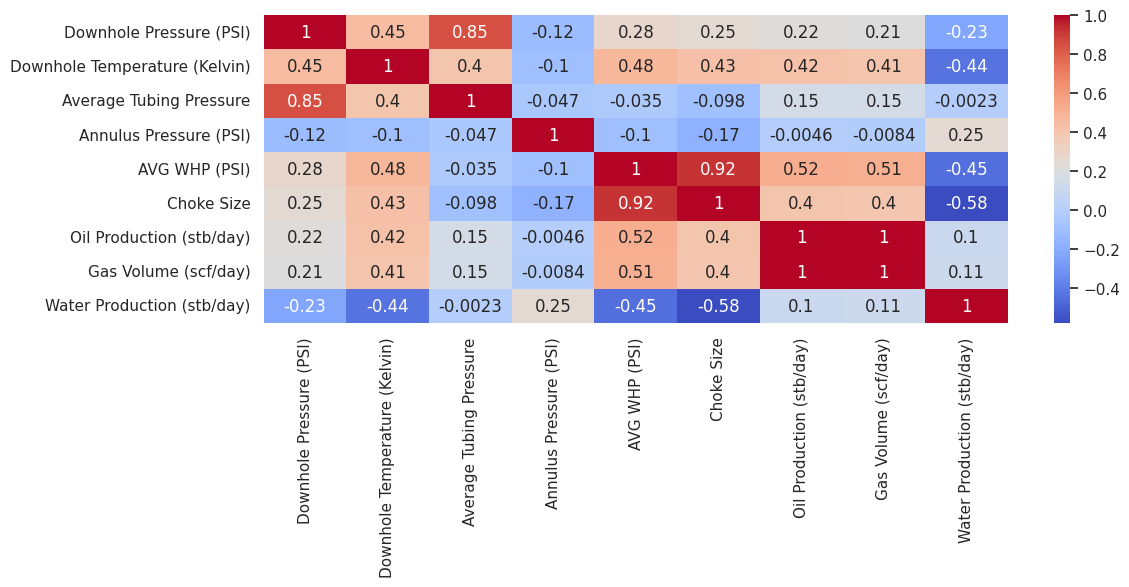

In [ ]:
#correlation matrix for numerical colums,using spearman's correlation beacause of the monotonic relationship between variables
c_m = encoded_data[['Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)']].corr(method = 'spearman')
plt.figure(figsize=(12,4))
sns.set_theme(style="white")
heatmap = sns.heatmap(c_m, annot=True, cmap="coolwarm")

### From the above heatmap, there is multicollinearity where Choke Size and Average well head pressure are highly correlated. Therefore,one of them would have to be dropped to prevent unstable estimation

**Data is clean and ready to be used for model implementation**

## 5. DATA SEPARATION INTO FEATURES AND TARGETS

In [ ]:

# Scaling the gas volume from billions to millions


# Define the output columns
outputs = ['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']

# Separating data into  target variable 'y' and features 'X'
y = encoded_data[outputs]
X = encoded_data.drop(outputs, axis=1) #dropping by columns



## 6. DATA SCALING (STANDARDIZATION)

In [ ]:
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and testing data
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.631613, -1.657725, -2.056257, ..., 0.863870, -0.689808,
        -1.003873],
       [-1.631613, -1.657725, -2.056257, ..., 0.863870, -0.689808,
        -0.889878],
       [-1.631613, -1.657725, -2.056257, ..., 0.863870, -0.689808,
        -0.775884],
       ...,
       [0.213369, 0.640064, 0.304624, ..., 1.300954, -0.100685, 1.390011],
       [0.220605, 0.639509, 0.315623, ..., 1.300954, -0.100685, 1.504005],
       [0.205226, 0.641197, 0.290579, ..., 1.300954, -0.100685, 1.617999]])

## 7.DATA SPLITTING

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Print the shapes of the training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5881, 16)
(5881, 3)
(1038, 16)
(1038, 3)


In [ ]:
##ensuring every column is numerical and has no null values to make training effective
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6919 entries, 0 to 6924
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Downhole Pressure (PSI)          6919 non-null   float64
 1   Downhole Temperature (Kelvin)    6919 non-null   float64
 2   Average Tubing Pressure          6919 non-null   float64
 3   Annulus Pressure (PSI)           6919 non-null   float64
 4   AVG WHP (PSI)                    6919 non-null   float64
 5   Choke Size                       6919 non-null   float64
 6   Oil Production (stb/day)         6919 non-null   float64
 7   Gas Volume (scf/day)             6919 non-null   float64
 8   Water Production (stb/day)       6919 non-null   float64
 9   WELL_BORE_CODE_DSEAT-001-F-1 C   6919 non-null   int64  
 10  WELL_BORE_CODE_DSEAT-001-F-11 H  6919 non-null   int64  
 11  WELL_BORE_CODE_DSEAT-001-F-12 H  6919 non-null   int64  
 12  WELL_BORE_CODE_DSEAT-001-

# 8.MODEL SELECTION

*The Models Seleceted for this project will be Random Forest XGBoost and Support Vector Regression. The Best Model Will be chosen further for predictions.*

## 8.1 RANDOM FOREST


In [ ]:
# Defining the regressor model (Random Forest Regressor with MultiOutputRegressor)
RF = RandomForestRegressor(random_state=42)
mor_RF = MultiOutputRegressor(RF)

# Training the model
mor_RF.fit(X_train, y_train)




MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

## 8.1.1 EVALUATION METRICS ON TRAIN DATA

In [ ]:
y_pred_train = mor_RF.predict(X_train) #predicting on the train data

mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error(RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 87585430353.5681
Root Mean Square Error(RMSE): 295948.35757876426
Mean Absolute Error (MAE): 61848.54484897354
R² Score: 0.9941772961228724


## 8.1.2 EVALUATION METRICS ON TEST DATA

In [ ]:
# Predicting on the test data
y_pred = mor_RF.predict(X_test)

#Evaluation Metrics

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error(RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 1003268677161.8073
Root Mean Square Error(RMSE): 1001633.0052278665
Mean Absolute Error (MAE): 204289.38006757633
R² Score: 0.9491552196835048


In [ ]:
!pip install xgboost

## 8.2    XG BOOST

In [ ]:
# Defining the XGBoost Regressor model
XGB = XGBRegressor(random_state=42)
mor_XGB = MultiOutputRegressor(XGB)

# Training the model
mor_XGB.fit(X_train, y_train)






MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

## 8.2.1 EVALUATION METRICS ON TRAIN DATA

In [ ]:
y_pred_X = mor_XGB.predict(X_train)

mse = mean_squared_error(y_train, y_pred_X)
mae = mean_absolute_error(y_train, y_pred_X)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error(RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 51755412890.06494
Root Mean Square Error(RMSE): 227498.1601905056
Mean Absolute Error (MAE): 73684.79630417643
R² Score: 0.9941772961228724


## 8.2.2 EVALUATION METRICS ON TEST DATA

In [ ]:
# Predicting on the test set
y_pred_XG = mor_XGB.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_XG)
mse = mean_squared_error(y_test, y_pred_XG)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_XG)

print(f"XGBoost - Mean Absolute Error (MAE): {mae}")
print(f"XGBoost - Mean Squared Error (MSE): {mse}")
print(f"XGBoost - Root Mean Squared Error (RMSE): {rmse}")
print(f"XGBoost - R² Score: {r2}")


XGBoost - Mean Absolute Error (MAE): 236790.4415192364
XGBoost - Mean Squared Error (MSE): 1207538370112.6838
XGBoost - Root Mean Squared Error (RMSE): 1098880.507658901
XGBoost - R² Score: 0.9432482897950774


## 8.3 SUPPORT VECTOR REGRESSION

In [ ]:
SVR_model = SVR()
mor_SVR = MultiOutputRegressor(SVR_model)

#Training the model
mor_SVR.fit(X_train,y_train)


MultiOutputRegressor(estimator=SVR())

### 8.3.1  EVALUATION METRICS ON TRAIN DATA

In [ ]:
y_pred_SVR = mor_SVR.predict(X_train)

mse = mean_squared_error(y_train, y_pred_SVR)
mae = mean_absolute_error(y_train, y_pred_SVR)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error(RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 18358194534526.227
Root Mean Square Error(RMSE): 4284646.372167279
Mean Absolute Error (MAE): 1746665.6763824776
R² Score: 0.9941772961228724


### 8.3.2 EVALUATION METRICS ON TEST DATA

In [ ]:
# Predicting on the test set
y_SVR = mor_SVR.predict(X_test)

#Evaluation Metrics

mse = mean_squared_error(y_test, y_SVR)
mae = mean_absolute_error(y_test, y_SVR)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error(RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 18933554184208.24
Root Mean Square Error(RMSE): 4351270.41037537
Mean Absolute Error (MAE): 1759573.1635458528
R² Score: 0.9491552196835048


## PART B
#### Running predictions on validation data set and outputting to a csv file

## LOADING VALIDATION DATA


In [ ]:
##running predictions on validation data set and outputting to a csv file
validation_data = pd.read_csv('/content/dseats_2024_validation_dataset (2).csv')
validation_data

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN
1,2015-07-02 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN
2,2015-07-03 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN
3,2015-07-04 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN
4,2015-07-05 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## VALIDATION DATA CLEANING



In [ ]:
#dropping NaN values in the dataframe
cleaned_validation_data = validation_data.dropna(how='all')
cleaned_validation_data

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN
1,2015-07-02 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN
2,2015-07-03 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN
3,2015-07-04 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN
4,2015-07-05 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,2016-09-12 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.876190,NaN,NaN,NaN
2071,2016-09-13 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.974080,NaN,NaN,NaN
2072,2016-09-14 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.063160,NaN,NaN,NaN
2073,2016-09-15 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.174450,NaN,NaN,NaN


## VALIDATION DATA WRANGLING


In [ ]:
cleaned_validation_data.info() #

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 0 to 2074
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PRODUCTION DATE                2075 non-null   object 
 1   Field Name                     2075 non-null   object 
 2   WELL_BORE_CODE                 2075 non-null   object 
 3   N_WELL_BORE_CODE               2075 non-null   float64
 4   WellBore Name                  2075 non-null   object 
 5   FLOW_KIND                      2075 non-null   object 
 6   WELL_TYPE                      2075 non-null   object 
 7   Downhole Pressure (PSI)        2075 non-null   float64
 8   Downhole Temperature (Kelvin)  2075 non-null   float64
 9   Average Tubing Pressure        2075 non-null   float64
 10  Annulus Pressure (PSI)         2075 non-null   float64
 11  AVG WHP (PSI)                  2075 non-null   float64
 12  Choke Size                     2075 non-null   float6

In [ ]:
cleaned_validation_data.drop(columns=['N_WELL_BORE_CODE','WellBore Name'],inplace=True)
cleaned_validation_data

<ipython-input-256-a431947c6983>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_validation_data.drop(columns=['N_WELL_BORE_CODE','WellBore Name'],inplace=True)


,PRODUCTION DATE,Field Name,WELL_BORE_CODE,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01 00:00:00,DSEAT,DSEAT-001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN
1,2015-07-02 00:00:00,DSEAT,DSEAT-001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN
2,2015-07-03 00:00:00,DSEAT,DSEAT-001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN
3,2015-07-04 00:00:00,DSEAT,DSEAT-001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN
4,2015-07-05 00:00:00,DSEAT,DSEAT-001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,2016-09-12 00:00:00,DSEAT,DSEAT-001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.876190,NaN,NaN,NaN
2071,2016-09-13 00:00:00,DSEAT,DSEAT-001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.974080,NaN,NaN,NaN
2072,2016-09-14 00:00:00,DSEAT,DSEAT-001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.063160,NaN,NaN,NaN
2073,2016-09-15 00:00:00,DSEAT,DSEAT-001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.174450,NaN,NaN,NaN


In [ ]:
date_format = '%Y-%m-%d %H:%M:%S'
cleaned_validation_data['PRODUCTION DATE'] = pd.to_datetime(cleaned_validation_data['PRODUCTION DATE'], format=date_format)
cleaned_validation_data

<ipython-input-257-469da49accb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_validation_data['PRODUCTION DATE'] = pd.to_datetime(cleaned_validation_data['PRODUCTION DATE'], format=date_format)


,PRODUCTION DATE,Field Name,WELL_BORE_CODE,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN
1,2015-07-02,DSEAT,DSEAT-001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN
2,2015-07-03,DSEAT,DSEAT-001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN
3,2015-07-04,DSEAT,DSEAT-001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN
4,2015-07-05,DSEAT,DSEAT-001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,2016-09-12,DSEAT,DSEAT-001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.876190,NaN,NaN,NaN
2071,2016-09-13,DSEAT,DSEAT-001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.974080,NaN,NaN,NaN
2072,2016-09-14,DSEAT,DSEAT-001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.063160,NaN,NaN,NaN
2073,2016-09-15,DSEAT,DSEAT-001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.174450,NaN,NaN,NaN


In [ ]:
categorical_cols = [col for col in cleaned_validation_data.columns if cleaned_validation_data[col].dtype == 'object']
for col in categorical_cols:
    print(f"Column {col}: {cleaned_validation_data[col].unique()}")

Column Field Name: ['DSEAT']
Column WELL_BORE_CODE: ['DSEAT-001-F-1 C' 'DSEAT-001-F-11 H' 'DSEAT-001-F-12 H'
 'DSEAT-001-F-14 H' 'DSEAT-001-F-15 D']
Column FLOW_KIND: ['production']
Column WELL_TYPE: ['OP']


In [ ]:
cleaned_validation_data.drop(columns=['Field Name','FLOW_KIND'],inplace=True)
cleaned_validation_data.head(10)

<ipython-input-259-881678779482>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_validation_data.drop(columns=['Field Name','FLOW_KIND'],inplace=True)


,PRODUCTION DATE,WELL_BORE_CODE,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01,DSEAT-001-F-1 C,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN
1,2015-07-02,DSEAT-001-F-1 C,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN
2,2015-07-03,DSEAT-001-F-1 C,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN
3,2015-07-04,DSEAT-001-F-1 C,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN
4,2015-07-05,DSEAT-001-F-1 C,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN
5,2015-07-06,DSEAT-001-F-1 C,OP,3528.245995,374.671220,2329.113395,0.0,1199.132600,55.078030,NaN,NaN,NaN
6,2015-07-07,DSEAT-001-F-1 C,OP,3632.555515,374.592690,2283.211470,0.0,1349.344045,65.530560,NaN,NaN,NaN
7,2015-07-08,DSEAT-001-F-1 C,OP,3789.769445,374.675730,2338.196630,0.0,1451.572815,72.483380,NaN,NaN,NaN
8,2015-07-09,DSEAT-001-F-1 C,OP,3864.126170,374.567900,2367.046700,0.0,1497.079470,75.718760,NaN,NaN,NaN
9,2015-07-10,DSEAT-001-F-1 C,OP,3911.226230,374.464120,2384.321710,0.0,1526.904520,77.858250,NaN,NaN,NaN


In [ ]:
categorical_cols = [col for col in cleaned_validation_data.columns if cleaned_validation_data[col].dtype == 'object']
encoded_validation_data = pd.get_dummies(cleaned_validation_data, columns=categorical_cols,dtype=int)
encoded_validation_data.head(10)

,PRODUCTION DATE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day),WELL_BORE_CODE_DSEAT-001-F-1 C,WELL_BORE_CODE_DSEAT-001-F-11 H,WELL_BORE_CODE_DSEAT-001-F-12 H,WELL_BORE_CODE_DSEAT-001-F-14 H,WELL_BORE_CODE_DSEAT-001-F-15 D,WELL_TYPE_OP
0,2015-07-01,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN,1,0,0,0,0,1
1,2015-07-02,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN,1,0,0,0,0,1
2,2015-07-03,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN,1,0,0,0,0,1
3,2015-07-04,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN,1,0,0,0,0,1
4,2015-07-05,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN,1,0,0,0,0,1
5,2015-07-06,3528.245995,374.671220,2329.113395,0.0,1199.132600,55.078030,NaN,NaN,NaN,1,0,0,0,0,1
6,2015-07-07,3632.555515,374.592690,2283.211470,0.0,1349.344045,65.530560,NaN,NaN,NaN,1,0,0,0,0,1
7,2015-07-08,3789.769445,374.675730,2338.196630,0.0,1451.572815,72.483380,NaN,NaN,NaN,1,0,0,0,0,1
8,2015-07-09,3864.126170,374.567900,2367.046700,0.0,1497.079470,75.718760,NaN,NaN,NaN,1,0,0,0,0,1
9,2015-07-10,3911.226230,374.464120,2384.321710,0.0,1526.904520,77.858250,NaN,NaN,NaN,1,0,0,0,0,1


In [ ]:
encoded_validation_data['WELL_TYPE_WI'] = 0
encoded_validation_data

,PRODUCTION DATE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day),WELL_BORE_CODE_DSEAT-001-F-1 C,WELL_BORE_CODE_DSEAT-001-F-11 H,WELL_BORE_CODE_DSEAT-001-F-12 H,WELL_BORE_CODE_DSEAT-001-F-14 H,WELL_BORE_CODE_DSEAT-001-F-15 D,WELL_TYPE_OP,WELL_TYPE_WI
0,2015-07-01,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN,1,0,0,0,0,1,0
1,2015-07-02,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN,1,0,0,0,0,1,0
2,2015-07-03,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN,1,0,0,0,0,1,0
3,2015-07-04,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN,1,0,0,0,0,1,0
4,2015-07-05,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,2016-09-12,5015.648165,363.184330,5015.648165,0.0,0.000000,13.876190,NaN,NaN,NaN,0,0,0,0,1,1,0
2071,2016-09-13,5015.648165,363.184330,5015.648165,0.0,0.000000,13.974080,NaN,NaN,NaN,0,0,0,0,1,1,0
2072,2016-09-14,5015.648165,363.184330,5015.648165,0.0,0.000000,14.063160,NaN,NaN,NaN,0,0,0,0,1,1,0
2073,2016-09-15,5015.648165,363.184330,5015.648165,0.0,0.000000,14.174450,NaN,NaN,NaN,0,0,0,0,1,1,0


In [ ]:
encoded_validation_data['Year'] = encoded_validation_data['PRODUCTION DATE'].dt.year
encoded_validation_data['Month'] = encoded_validation_data['PRODUCTION DATE'].dt.month
encoded_validation_data['Day'] = encoded_validation_data['PRODUCTION DATE'].dt.day
encoded_validation_data.drop(columns=['PRODUCTION DATE'],inplace=True)
encoded_validation_data.head(10)

,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day),WELL_BORE_CODE_DSEAT-001-F-1 C,WELL_BORE_CODE_DSEAT-001-F-11 H,WELL_BORE_CODE_DSEAT-001-F-12 H,WELL_BORE_CODE_DSEAT-001-F-14 H,WELL_BORE_CODE_DSEAT-001-F-15 D,WELL_TYPE_OP,WELL_TYPE_WI,Year,Month,Day
0,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN,1,0,0,0,0,1,0,2015,7,1
1,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN,1,0,0,0,0,1,0,2015,7,2
2,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN,1,0,0,0,0,1,0,2015,7,3
3,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN,1,0,0,0,0,1,0,2015,7,4
4,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN,1,0,0,0,0,1,0,2015,7,5
5,3528.245995,374.671220,2329.113395,0.0,1199.132600,55.078030,NaN,NaN,NaN,1,0,0,0,0,1,0,2015,7,6
6,3632.555515,374.592690,2283.211470,0.0,1349.344045,65.530560,NaN,NaN,NaN,1,0,0,0,0,1,0,2015,7,7
7,3789.769445,374.675730,2338.196630,0.0,1451.572815,72.483380,NaN,NaN,NaN,1,0,0,0,0,1,0,2015,7,8
8,3864.126170,374.567900,2367.046700,0.0,1497.079470,75.718760,NaN,NaN,NaN,1,0,0,0,0,1,0,2015,7,9
9,3911.226230,374.464120,2384.321710,0.0,1526.904520,77.858250,NaN,NaN,NaN,1,0,0,0,0,1,0,2015,7,10


# VALIDATION DATA SEPARATION



In [ ]:
# Define the output columns
outputs = ['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']
validation_data_y = encoded_validation_data[outputs]
validation_data_X = encoded_validation_data.loc[:, ~encoded_validation_data.columns.isin(outputs)]
validation_data_X


,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,WELL_BORE_CODE_DSEAT-001-F-1 C,WELL_BORE_CODE_DSEAT-001-F-11 H,WELL_BORE_CODE_DSEAT-001-F-12 H,WELL_BORE_CODE_DSEAT-001-F-14 H,WELL_BORE_CODE_DSEAT-001-F-15 D,WELL_TYPE_OP,WELL_TYPE_WI,Year,Month,Day
0,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,1,0,0,0,0,1,0,2015,7,1
1,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,1,0,0,0,0,1,0,2015,7,2
2,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,1,0,0,0,0,1,0,2015,7,3
3,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,1,0,0,0,0,1,0,2015,7,4
4,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,1,0,0,0,0,1,0,2015,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,5015.648165,363.184330,5015.648165,0.0,0.000000,13.876190,0,0,0,0,1,1,0,2016,9,12
2071,5015.648165,363.184330,5015.648165,0.0,0.000000,13.974080,0,0,0,0,1,1,0,2016,9,13
2072,5015.648165,363.184330,5015.648165,0.0,0.000000,14.063160,0,0,0,0,1,1,0,2016,9,14
2073,5015.648165,363.184330,5015.648165,0.0,0.000000,14.174450,0,0,0,0,1,1,0,2016,9,15


# VALIDATION DATA SCALING


In [ ]:
validation_data_scaled = scaler.transform(validation_data_X)
validation_data_scaled


array([[0.297077, 0.669326, 0.471286, ..., 1.300954, 0.193877, -1.687839],
       [0.414703, 0.584791, 0.364517, ..., 1.300954, 0.193877, -1.573845],
       [0.468295, 0.568024, 0.351649, ..., 1.300954, 0.193877, -1.459851],
       ...,
       [1.528411, 0.290962, 2.709974, ..., 1.738037, 0.783001, -0.205912],
       [1.528411, 0.290962, 2.709974, ..., 1.738037, 0.783001, -0.091917],
       [1.528411, 0.290962, 2.709974, ..., 1.738037, 0.783001, 0.022077]])

# MODEL IMPLEMENTATION (RANDOM FOREST WAS CHOSEN)

In [ ]:
validation_data_pred  = mor_RF.predict(validation_data_scaled)
validation_data_pred

array([[2230.373616, 1814476.818880, 3658.658383],
       [109.959893, 93062.134830, 615.114196],
       [0.000000, 0.000000, 452.368623],
       ...,
       [0.000000, 0.000000, 734.278875],
       [0.000000, 0.000000, 734.434238],
       [0.000000, 0.000000, 682.973232]])

In [ ]:
validation_data_output = pd.DataFrame(validation_data_pred, columns=outputs) #putting the predictions in a dataframe
validation_data_output

,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2230.373616,1.814477e+06,3658.658383
1,109.959893,9.306213e+04,615.114196
2,0.000000,0.000000e+00,452.368623
3,0.000000,0.000000e+00,608.787085
4,0.000000,0.000000e+00,274.447167
...,...,...,...
2070,0.000000,0.000000e+00,861.035584
2071,0.000000,0.000000e+00,799.669086
2072,0.000000,0.000000e+00,734.278875
2073,0.000000,0.000000e+00,734.434238


In [ ]:
validation_data_output.head(50)

,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2230.373616,1.814477e+06,3658.658383
1,109.959893,9.306213e+04,615.114196
2,0.000000,0.000000e+00,452.368623
3,0.000000,0.000000e+00,608.787085
4,0.000000,0.000000e+00,274.447167
5,0.000000,0.000000e+00,2.920447
6,0.000000,0.000000e+00,0.761719
7,0.000000,0.000000e+00,0.000000
8,0.000000,0.000000e+00,0.000000
9,0.000000,0.000000e+00,0.000000


In [ ]:
validation_data_output['Oil Production (stb/day)'].sum()

5651974.504160002

In [ ]:
validation_data_output['Gas Volume (scf/day)'].sum()

4756790973.732349

In [ ]:
validation_data_output['Water Production (stb/day)'].sum()

14163630.505352996

In [ ]:
original_validation_data = pd.read_csv('/content/dseats_2024_validation_dataset (2).csv')
original_validation_data.drop(columns=outputs,inplace=True)
original_validation_data.head(20)

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size
0,2015-07-01 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632
1,2015-07-02 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180
2,2015-07-03 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780
3,2015-07-04 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940
4,2015-07-05 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140
5,2015-07-06 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3528.245995,374.671220,2329.113395,0.0,1199.132600,55.078030
6,2015-07-07 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3632.555515,374.592690,2283.211470,0.0,1349.344045,65.530560
7,2015-07-08 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3789.769445,374.675730,2338.196630,0.0,1451.572815,72.483380
8,2015-07-09 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3864.126170,374.567900,2367.046700,0.0,1497.079470,75.718760
9,2015-07-10 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3911.226230,374.464120,2384.321710,0.0,1526.904520,77.858250


In [ ]:
cleaned_validation_data = validation_data.dropna(how='all')
cleaned_validation_data

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN
1,2015-07-02 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN
2,2015-07-03 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN
3,2015-07-04 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN
4,2015-07-05 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,2016-09-12 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.876190,NaN,NaN,NaN
2071,2016-09-13 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.974080,NaN,NaN,NaN
2072,2016-09-14 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.063160,NaN,NaN,NaN
2073,2016-09-15 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.174450,NaN,NaN,NaN


In [ ]:
original_validation_data[outputs] = validation_data_output
original_validation_data.head(10)

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,2230.373616,1.814477e+06,3658.658383
1,2015-07-02 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,109.959893,9.306213e+04,615.114196
2,2015-07-03 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,0.000000,0.000000e+00,452.368623
3,2015-07-04 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,0.000000,0.000000e+00,608.787085
4,2015-07-05 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,0.000000,0.000000e+00,274.447167
5,2015-07-06 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3528.245995,374.671220,2329.113395,0.0,1199.132600,55.078030,0.000000,0.000000e+00,2.920447
6,2015-07-07 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3632.555515,374.592690,2283.211470,0.0,1349.344045,65.530560,0.000000,0.000000e+00,0.761719
7,2015-07-08 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3789.769445,374.675730,2338.196630,0.0,1451.572815,72.483380,0.000000,0.000000e+00,0.000000
8,2015-07-09 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3864.126170,374.567900,2367.046700,0.0,1497.079470,75.718760,0.000000,0.000000e+00,0.000000
9,2015-07-10 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3911.226230,374.464120,2384.321710,0.0,1526.904520,77.858250,0.000000,0.000000e+00,0.000000


In [ ]:
original_validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PRODUCTION DATE                2075 non-null   object 
 1   Field Name                     2075 non-null   object 
 2   WELL_BORE_CODE                 2075 non-null   object 
 3   N_WELL_BORE_CODE               2075 non-null   float64
 4   WellBore Name                  2075 non-null   object 
 5   FLOW_KIND                      2075 non-null   object 
 6   WELL_TYPE                      2075 non-null   object 
 7   Downhole Pressure (PSI)        2075 non-null   float64
 8   Downhole Temperature (Kelvin)  2075 non-null   float64
 9   Average Tubing Pressure        2075 non-null   float64
 10  Annulus Pressure (PSI)         2075 non-null   float64
 11  AVG WHP (PSI)                  2075 non-null   float64
 12  Choke Size                     2075 non-null   f

In [ ]:
cleaned_original_validation_data = original_validation_data.dropna(how='all')
cleaned_original_validation_data

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,2230.373616,1.814477e+06,3658.658383
1,2015-07-02 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,109.959893,9.306213e+04,615.114196
2,2015-07-03 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,0.000000,0.000000e+00,452.368623
3,2015-07-04 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,0.000000,0.000000e+00,608.787085
4,2015-07-05 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,0.000000,0.000000e+00,274.447167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,2016-09-12 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.876190,0.000000,0.000000e+00,861.035584
2071,2016-09-13 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.974080,0.000000,0.000000e+00,799.669086
2072,2016-09-14 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.063160,0.000000,0.000000e+00,734.278875
2073,2016-09-15 00:00:00,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.174450,0.000000,0.000000e+00,734.434238


In [ ]:
##Checking for invalid dates and converting them to ensure consistency
## Processing the original or final validation data for plotting
date_format = '%Y-%m-%d %H:%M:%S'
cleaned_original_validation_data['PRODUCTION DATE'] = pd.to_datetime(original_validation_data['PRODUCTION DATE'], format=date_format)
cleaned_original_validation_data

<ipython-input-281-d529c668b26b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_original_validation_data['PRODUCTION DATE'] = pd.to_datetime(original_validation_data['PRODUCTION DATE'], format=date_format)


,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,2230.373616,1.814477e+06,3658.658383
1,2015-07-02,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,109.959893,9.306213e+04,615.114196
2,2015-07-03,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,0.000000,0.000000e+00,452.368623
3,2015-07-04,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,0.000000,0.000000e+00,608.787085
4,2015-07-05,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,0.000000,0.000000e+00,274.447167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,2016-09-12,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.876190,0.000000,0.000000e+00,861.035584
2071,2016-09-13,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.974080,0.000000,0.000000e+00,799.669086
2072,2016-09-14,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.063160,0.000000,0.000000e+00,734.278875
2073,2016-09-15,DSEAT,DSEAT-001-F-15 D,109.0,001-F-15 D,production,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.174450,0.000000,0.000000e+00,734.434238


In [ ]:
cleaned_original_validation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 0 to 2074
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   PRODUCTION DATE                2075 non-null   datetime64[ns]
 1   Field Name                     2075 non-null   object        
 2   WELL_BORE_CODE                 2075 non-null   object        
 3   N_WELL_BORE_CODE               2075 non-null   float64       
 4   WellBore Name                  2075 non-null   object        
 5   FLOW_KIND                      2075 non-null   object        
 6   WELL_TYPE                      2075 non-null   object        
 7   Downhole Pressure (PSI)        2075 non-null   float64       
 8   Downhole Temperature (Kelvin)  2075 non-null   float64       
 9   Average Tubing Pressure        2075 non-null   float64       
 10  Annulus Pressure (PSI)         2075 non-null   float64       
 11  AVG WHP (PSI)         

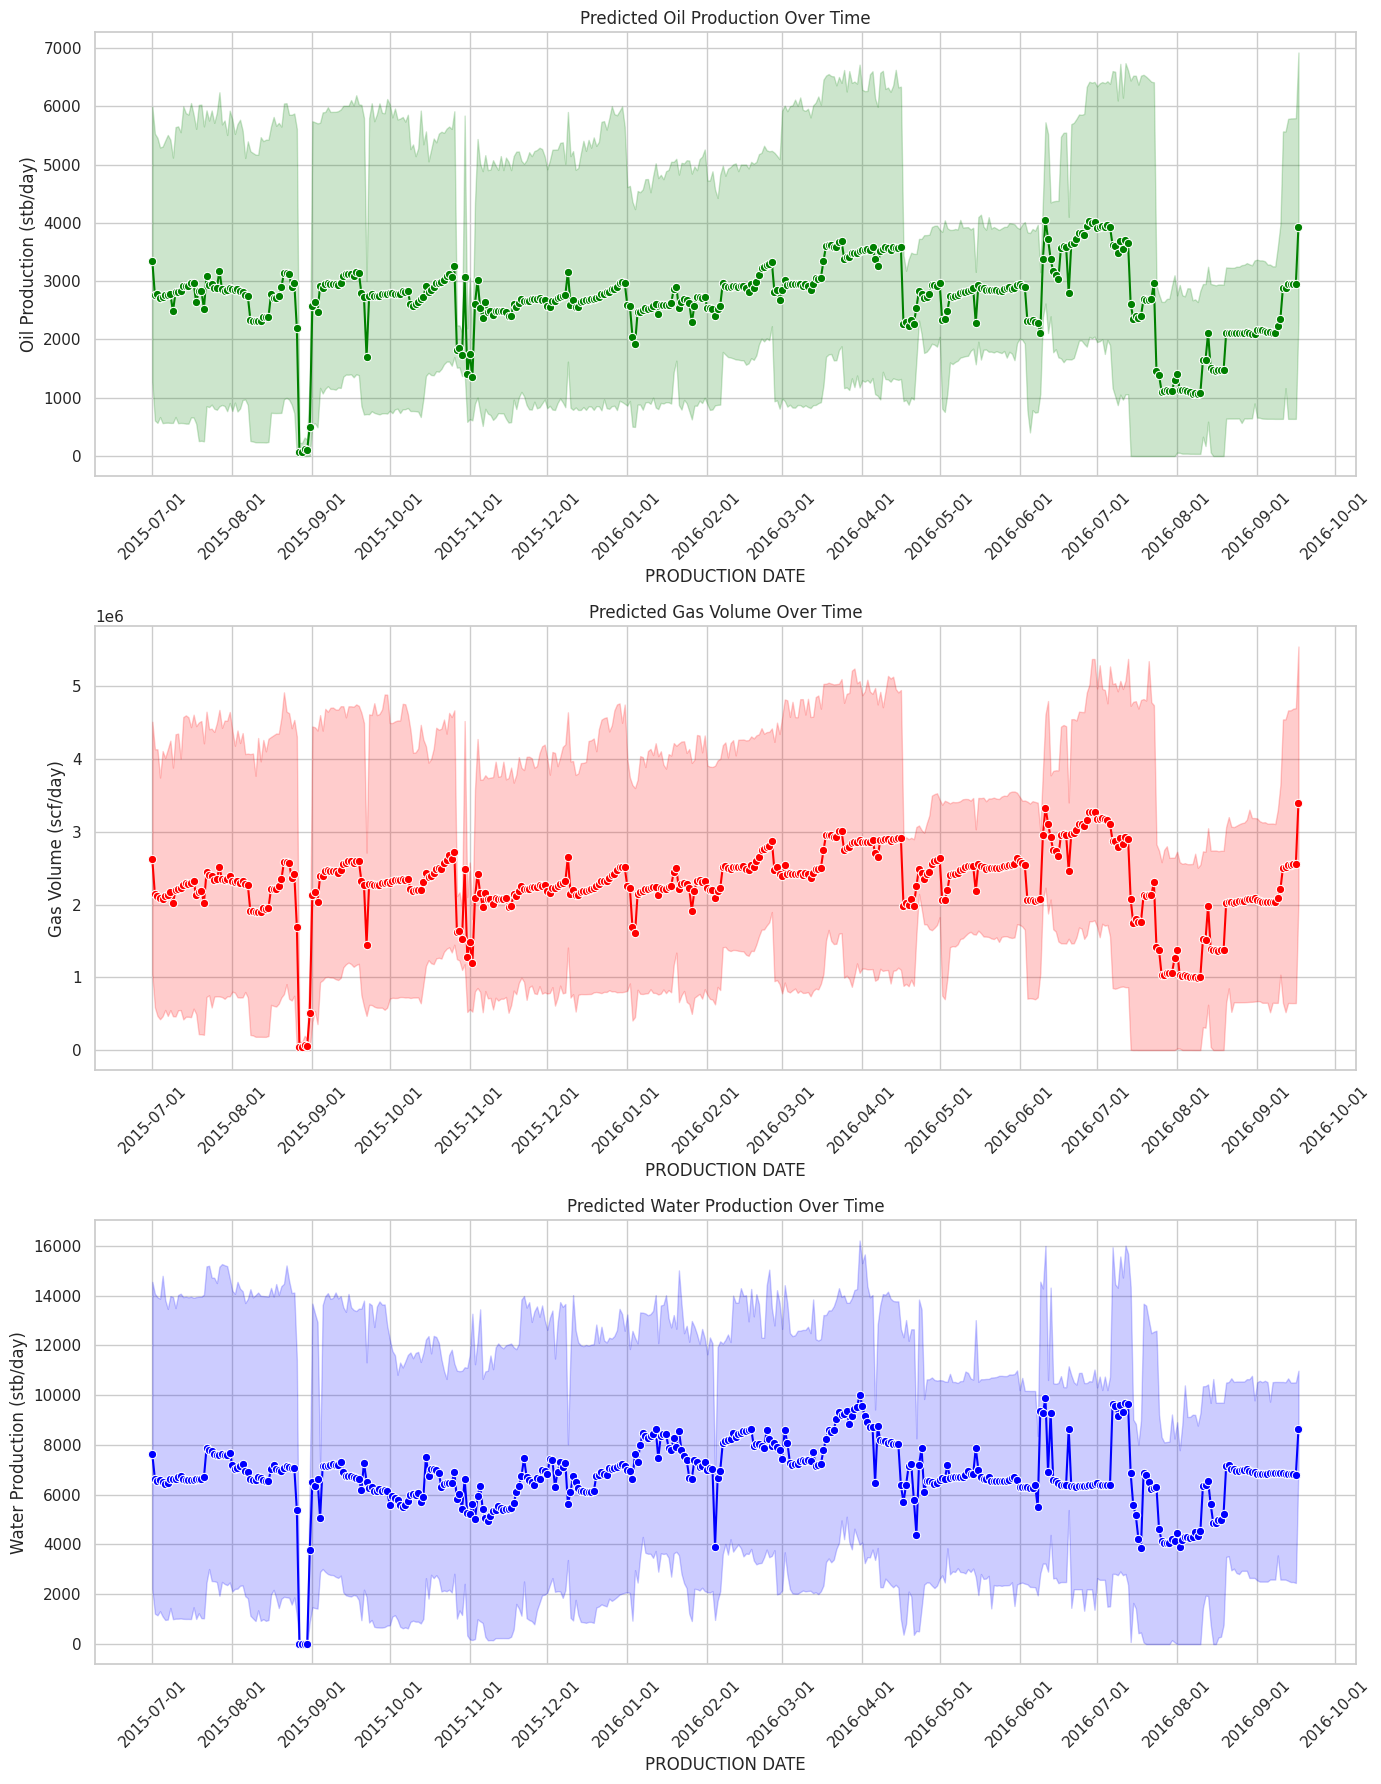

In [ ]:
# Setting the style of the visualization
sns.set_style("whitegrid")

# Creating a figure with subplots for each target variable
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# List of target variables and their corresponding colors and titles
targets = ['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']
colors = ['green', 'red', 'blue']
titles = ['Predicted Oil Production Over Time', 'Predicted Gas Volume Over Time', 'Predicted Water Production Over Time']

# Create individual line plots with custom colors
for i, target in enumerate(targets):
    sns.lineplot(data=cleaned_original_validation_data, x='PRODUCTION DATE', y=target, marker='o', ax=axes[i], color=colors[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('PRODUCTION DATE')
    axes[i].set_ylabel(target)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every 2nd month
    axes[i].xaxis.set_minor_locator(mdates.MonthLocator())  # Show every month as minor ticks
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date as Month-Year

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
cleaned_original_validation_data.to_csv('/content/dseats_2024_validation_dataset (2).csv',index=False)